## A Problem that stumped Milton Friedman

(and that Abraham Wald solved by inventing sequential analysis)

#### By [Chase Coleman](https://github.com/cc7768) and [Thomas J. Sargent](http://www.tomsargent.com/)

We begin by importing some packages called by the code that we will be using in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.stats as st
import seaborn as sb
import quantecon as qe
from ipywidgets import interact, widgets

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#-Download supporting Wald_Friedman_utils.py file from GitHub-#
qe.fetch_nb_dependencies(["Wald_Friedman_utils.py"])
from Wald_Friedman_utils import *

A file named Wald_Friedman_utils.py already exists in the specified directory ... skipping download.


### Sequential analysis

Key ideas in  play are:

 * Bayes' Law
 
 * Dynamic programming

 * type I and type II statistical errors
    
    * a type I error occurs when you reject a  null hypothesis that is true
    
    * a type II error is when you accept a null hypothesis that is false 
 

 * Abraham Wald's **sequential probability ratio test**
 
 * The **power** of a statistical test
 
 * The **critical region** of a statistical test
 
 * A **uniformly most powerful test**


On pages 137-139 of his book **Two Lucky People** with Rose Friedman, Milton Friedman described a problem presented to him and Allen Wallis during World War II when they worked at the U.S. government's Statistical Research Group at Columbia University.  

Let's listen to Milton Friedman tell what happened.

   "In order to understand the story, it is necessary to have an idea of a simple statistical problem, and of the
   standard procedure for dealing with it.  The actual problem out of which sequential analysis grew will serve.
   The Navy has two alternative designs (say A and B) for a projectile.  It wants to determine which is superior. 
   To do so it undertakes a series of paired firings. On each round it assigns the value 1 or 0 to A accordingly as
   its performance is superior or inferior to that of B and conversely 0 or 1 to B.  The Navy asks the statistician 
   how to conduct the test and how to analyze the results. 
   
   "The standard statistical answer was to specify a number of firings (say 1,000) and a pair of percentages
   (e.g., 53% and 47%) and tell the client that if A receives a 1 in more than 53% of the firings, it can be regarded
   as superior; if it receives a 1 in fewer than 47%, B can be regarded as superior; if the percentage is between
   47% and 53%, neither can be so regarded.
   
   "When Allen Wallis was discussing such a problem with (Navy) Captain Garret L. Schyler, the captain objected that     such a test, to quote from Allen's account, may prove wasteful.  If a wise and seasoned ordnance officer like   Schyler were on the premises, he would see after the first few thousand or even few hundred [rounds] that the   experiment need not be completed either because the new method is obviously inferior or because it is obviously   superior beyond what was hoped for $\ldots$ "
  
  Friedman and Wallis struggled with the problem but after realizing that they were not able to solve it themselves told Abraham Wald it.  That started  Wald on the path that led  *Sequential Analysis*. We'll formulate the problem using dynamic programming.

This started Wald on the path that led him to _Sequential Analysis_

## Dynamic programming formulation


The following presentation of the problem closely follows Dmitri Berskekas's treatment in **Dynamic Programming and Stochastic Control**.  

An i.i.d.  random variable $z$ can take on values 

  * $z \in [ v_1,  v_2, \ldots,  v_n]$ when $z$ is a discrete-valued random variable
  
  * $ z \in V$ when $z$ is a continuous random variable.  

A decision maker wants to  know which of two probability distributions governs  $z$. To formalize this idea,
let $x \in [x_0, x_1]$ be a hidden state that indexes the two distributions:

$$ P(v_k \mid x) = \begin{cases} f_0(v_k) & \mbox{if } x = x_0, \\
                              f_1(v_k) & \mbox{if } x = x_1. \end{cases} $$
                              
when $z$ is a discrete random variable and a density


$$ P(v \mid x) = \begin{cases} f_0(v) & \mbox{if } x = x_0, \\
                              f_1(v) & \mbox{if } x = x_1. \end{cases} $$
                              
when $v$ is continuously distributed.                              

                              

Before observing any outcomes, a decision maker believes that the probability that $x = x_0$ is $p_{-1}\in (0,1)$: 

$$ p_{-1} = \textrm{Prob}(x=x_0 \mid \textrm{ no observations}) $$

After observing $k+1$ observations $z_k, z_{k-1}, \ldots, z_0$ he believes that the probability that the distribution is $f_0$ is

$$ p_k = {\rm Prob} ( x = x_0 \mid z_k, z_{k-1}, \ldots, z_0) $$

We can compute this $p_k$ recursively by applying Bayes' law:

$$ p_0 = \frac{ p_{-1} f_0(z_0)}{ p_{-1} f_0(z_0) + (1-p_{-1}) f_1(z_0) } $$

and then

$$ p_{k+1} = \frac{ p_k f_0(z_{k+1})}{ p_k f_0(z_{k+1}) + (1-p_k) f_1 (z_{k+1}) }. $$


After observing $z_k, z_{k-1}, \ldots, z_0$, the decision maker believes that $z_{k+1}$ 
has probability distribution

$$ p(z_{k+1}) = p_k f_0(z_{k+1}) + (1-p_k) f_1 (z_{k+1}). $$

This is evidently a mixture of distributions $f_0$ and $f_1$, with the weight on $f_0$ being the posterior probability $f_0$ that the distribution is $f_0$. 

**Remark:** *Because the decision maker believes that $z_{k+1}$ is drawn from a mixture of two i.i.d. distributions, he does *not* believe that the sequence  $[z_{k+1}, z_{k+2}, \ldots] $ is i.i.d.  Instead, he believes that it is *exchangeable*.  See David Kreps
*Notes on the Theory of Choice*, chapter 11, for a discussion.*

Let's look at some examples of two distributions. Here we'll display two beta distributions.  First, we'll show the two distributions, then we'll show mixtures of these same two distributions with various mixing probabilities $p_k$.

In [3]:
# Create two distributions over 50 values for k
# We are using a discretized beta distribution
p_m1 = np.linspace(0, 1, 50)
f0 = np.clip(st.beta.pdf(p_m1, a=1, b=1), 1e-8, np.inf)
f0 = f0 / np.sum(f0)
f1 = np.clip(st.beta.pdf(p_m1, a=9, b=9), 1e-8, np.inf)
f1 = f1 / np.sum(f1)

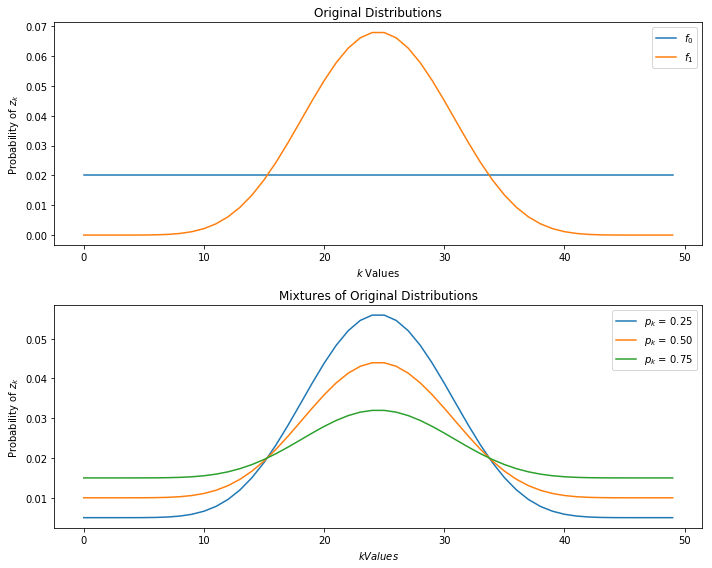

In [4]:
fig = make_distribution_plots(f0, f1)

fig.show()

### Losses and costs


After observing $z_k, z_{k-1}, \ldots, z_0$, the decision maker chooses among three distinct actions:

* He decides that $x = x_1$ and draws no more $z$'s

* He decides that $x = x_0$ and draws no more $z$'s

* He postpones deciding now and instead chooses to draw a $z_{k+1}$

Associated with these three actions, the decision maker suffers three kinds of losses:

 
* A loss $L_0$ if he decides $x = x_0$ when actually $x=x_1$

* A loss $L_1$ if he decides $x = x_1$ when actually $x=x_0$

* A cost $c$ if he postpones deciding and chooses instead to draw another  $z$ 

For example, suppose that we regard $x=x_0$ as a null hypothesis. Then  

* We can think of $L_1$ as the loss associated with a type I error

* We can think of $L_0$ as the loss associated with a type II error

### A Bellman equation

Let $J_k(p_k)$ be the  total loss for a decision maker who with posterior probability $p_k$ who chooses optimally.

The loss functions $\{J_k(p_k)\}_k$ satisfy the Bellman equations

$$ J_k(p_k) = \min \left[ (1-p_k) L_0, p_k L_1, c + E_{z_{k+1}} \left\{ J_{k+1} (p_{k+1} \right\} \right] $$

where $E_{z_{k+1}}$ denotes a mathematical expectation over the distribution of $z_{k+1}$ and  the minimization is over the three actions, accept $x_0$, accept $x_1$, and postpone deciding and draw 
a $z_{k+1}$.  

Let 

$$ A_k(p_k) = E_{z_{k+1}} \left\{ J_{k+1} \left[\frac{ p_k f_0(z_{k+1})}{ p_k f_0(z_{k+1}) + (1-p_k) f_1 (z_{k+1})  } \right] \right\} $$

Then we can write out Bellman equation as

$$ J_k(p_k) = \min \left[ (1-p_k) L_0, p_k L_1, c + A_k(p_k) \right] $$

where $p_k \in [0,1]$.  

Evidently,the optimal decision rule is characterized by two numbers $\alpha_k, \beta_k \in (0,1) \times (0,1)$
that satisfy

$$ (1- p_k) L_0 < \min p_k L_1, c + A_k(p_k)  \textrm { if } p_k \geq \alpha_k  $$

and 

$$ p_k L_1 < \min (1-p_k) L_0,  c + A_k(p_k) \textrm { if } p_k \leq \beta_k $$

The optimal decision rule is then

$$ \textrm { accept } x=x_0 \textrm{ if } p_k \geq \alpha_k \\
   \textrm { accept } x=x_1 \textrm{ if } p_k \leq \beta_k \\
   \textrm { draw another }  z \textrm{ if }  \beta_k \leq p_k \leq \alpha_k $$

### Infinite horizon version

An infinite horizon version of this problem is associated with the limiting Bellman equation 

$$ J(p_k) = \min \left[ (1-p_k) L_0, p_k L_1, c + A(p_k) \right] \quad (*) $$

where

$$ A(p_k) = E_{z_{k+1}} \left\{ J \left[\frac{ p_k f_0(z_{k+1})}{ p_k f_0(z_{k+1}) + (1-p_k) f_1 (z_{k+1})  } \right] \right\} $$

and again the minimization is over the three actions, accept $x_1$, accept $x_0$, and postpone deciding and draw 
a $z_{k+1}$.

Here

  * $ (1-p_k) L_0$ is the expected loss associated with accepting $x_1$ (i.e., the cost of making a type I error)
  
  *  $p_k L_1$ is the expected loss associated with accepting $x_0$ (i.e., the cost of making a type II error)
  
  * $ c + A(p_k)$ is the expected cost associated with drawing one more  $z$


Now the optimal decision rule is characterized by two probabilities $0 < \beta < \alpha < 1$ and 


$$ \textrm { accept } x=x_0 \textrm{ if } p_k \geq \alpha \\
   \textrm { accept } x=x_1 \textrm{ if } p_k \leq \beta \\
   \textrm { draw another }  z \textrm{ if } \beta \leq p_k \leq \alpha $$


  

One sensible approach is to write the three components of the value function that appears on the rights side of the Bellman equation as separate functions.  Later, doing this will help us obey the don't repeat yourself (DRY) rule of coding.  Here goes:

In [5]:
def expect_loss_choose_0(p, L0):
    "For a given probability return expected loss of choosing model 0"
    return (1-p)*L0

def expect_loss_choose_1(p, L1):
    "For a given probability return expected loss of choosing model 1"
    return p*L1

def EJ(p, f0, f1, J):
    """
    We will need to be able to evaluate the expectation of our Bellman
    equation J. In order to do this, we need the current probability
    that model 0 is correct (p), the distributions (f0, f1), and a
    function that can evaluate the Bellman equation
    """
    # Get the current distribution we believe (p*f0 + (1-p)*f1)
    curr_dist = p*f0 + (1-p)*f1
    
    # Get tomorrow's expected distribution through Bayes law
    tp1_dist = np.clip((p*f0) / (p*f0 + (1-p)*f1), 0, 1)
    
    # Evaluate the expectation
    EJ = curr_dist @ J(tp1_dist)
    
    return EJ

def expect_loss_cont(p, c, f0, f1, J):
    return c + EJ(p, f0, f1, J)

To approximate the solution of the Bellman equation (\*) above, we can deploy a method known as value function iteration (iterating on the Bellman equation) on a grid of points. Because we are iterating on a grid, the current probability, $p_k$, is restricted to a set number of points. However, in order to evaluate the expectation of the Bellman equation for tomorrow, $A(p_{k})$, we must be able to evaluate at various $p_{k+1}$ which may or may not correspond with points on our grid. The way that we resolve this issue is by using *linear interpolation*. This means to evaluate $J(p)$ where $p$ is not a grid point, we must use two points: first, we use the largest of all the grid points smaller than $p$, and call it $p_i$, and, second, we use the grid point immediately after $p$, named $p_{i+1}$, to approximate the function value in the following manner:

$$ J(p) = J(p_i) + (p - p_i) \frac{J(p_{i+1}) - J(p_i)}{p_{i+1} - p_{i}}$$

In one dimension, you can think of this as simply drawing a line between each pair of points on the grid.

For more information on both linear interpolation and value function iteration methods, see the Quant-Econ [lecture](http://quant-econ.net/py/ifp.html) on the income fluctuation problem.

In [6]:
def bellman_operator(pgrid, c, f0, f1, L0, L1, J):
    """
    Evaluates the value function for a given continuation value
    function; that is, evaluates

        J(p) = min(pL0, (1-p)L1, c + E[J(p')])

    Uses linear interpolation between points
    """
    m = np.size(pgrid)
    assert m == np.size(J)
    
    J_out = np.zeros(m)
    J_interp = interp.UnivariateSpline(pgrid, J, k=1, ext=0)

    for (p_ind, p) in enumerate(pgrid):
        # Payoff of choosing model 0
        p_c_0 = expect_loss_choose_0(p, L0)
        p_c_1 = expect_loss_choose_1(p, L1)
        p_con = expect_loss_cont(p, c, f0, f1, J_interp)
        
        J_out[p_ind] = min(p_c_0, p_c_1, p_con)

    return J_out

# To solve
pg = np.linspace(0, 1, 251)
bell_op = lambda vf: bellman_operator(pg, 0.5, f0, f1, 5.0, 5.0, vf)
J = qe.compute_fixed_point(bell_op, np.zeros(pg.size), error_tol=1e-6,
                           verbose=2, print_skip=5)

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            8.042e-02      8.594e-02         
10           6.418e-04      1.586e-01         
15           4.482e-06      2.215e-01         
17           6.152e-07      2.535e-01         
Converged in 17 steps


Now for some gentle criticisms of the preceding code. Although it works fine, by writing the code in terms of  functions, we have to  pass around some things that are constant throughout the problem,  i.e., $c$, $f_0$, $f_1$, $L_0$, and $L_1$. 

Now that we have a working script, let's turn it into a class.  This will allow us to simplify the function calls and make the code more reusable.

So to illustrate a good alternative approach, we write a class that stores all of our parameters for us internally and incorporates  many of the same functions that we used above.  

In [7]:
# %load -r 22-276 dependencies/Wald_Friedman_utils.py

class WaldFriedman(object):
    """
    This class is used to solve the problem presented in the "Wald Friedman"
    notebook presented on the QuantEcon website.

    Parameters
    ----------
    c : scalar(Float64)
        Cost of postponing decision
    L0 : scalar(Float64)
        Cost of choosing model 0 when the truth is model 1
    L1 : scalar(Float64)
        Cost of choosing model 1 when the truth is model 0
    f0 : array_like(Float64)
        A finite state probability distribution
    f1 : array_like(Float64)
        A finite state probability distribution
    m : scalar(Int)
        Number of points to use in function approximation
    """
    def __init__(self, c, L0, L1, f0, f1, m=25):
        self.c = c
        self.L0, self.L1 = L0, L1
        self.m = m
        self.pgrid = np.linspace(0.0, 1.0, m)

        # Renormalize distributions so nothing is "too" small
        f0 = np.clip(f0, 1e-8, 1-1e-8)
        f1 = np.clip(f1, 1e-8, 1-1e-8)
        self.f0 = f0 / np.sum(f0)
        self.f1 = f1 / np.sum(f1)
        self.J = np.zeros(m)

    def current_distribution(self, p):
        """
        This function takes a value for the probability with which
        the correct model is model 0 and returns the mixed
        distribution that corresponds with that belief.
        """
        return p*self.f0 + (1-p)*self.f1

    def bayes_update_k(self, p, k):
        """
        This function takes a value for p, and a realization of the
        random variable and calculates the value for p tomorrow.
        """
        f0_k = self.f0[k]
        f1_k = self.f1[k]

        p_tp1 = p*f0_k / (p*f0_k + (1-p)*f1_k)

        return np.clip(p_tp1, 0, 1)

    def bayes_update_all(self, p):
        """
        This is similar to `bayes_update_k` except it returns a
        new value for p for each realization of the random variable
        """
        return np.clip(p*self.f0 / (p*self.f0 + (1-p)*self.f1), 0, 1)

    def payoff_choose_f0(self, p):
        "For a given probability specify the cost of accepting model 0"
        return (1-p)*self.L0

    def payoff_choose_f1(self, p):
        "For a given probability specify the cost of accepting model 1"
        return p*self.L1

    def EJ(self, p, J):
        """
        This function evaluates the expectation of the value function
        at period t+1. It does so by taking the current probability
        distribution over outcomes:

            p(z_{k+1}) = p_k f_0(z_{k+1}) + (1-p_k) f_1(z_{k+1})

        and evaluating the value function at the possible states
        tomorrow J(p_{t+1}) where

            p_{t+1} = p f0 / ( p f0 + (1-p) f1)

        Parameters
        ----------
        p : Scalar(Float64)
            The current believed probability that model 0 is the true
            model.
        J : Function
            The current value function for a decision to continue

        Returns
        -------
        EJ : Scalar(Float64)
            The expected value of the value function tomorrow
        """
        # Pull out information
        f0, f1 = self.f0, self.f1

        # Get the current believed distribution and tomorrows possible dists
        # Need to clip to make sure things don't blow up (go to infinity)
        curr_dist = self.current_distribution(p)
        tp1_dist = self.bayes_update_all(p)

        # Evaluate the expectation
        EJ = curr_dist @ J(tp1_dist)

        return EJ

    def payoff_continue(self, p, J):
        """
        For a given probability distribution and value function give
        cost of continuing the search for correct model
        """
        return self.c + self.EJ(p, J)

    def bellman_operator(self, J):
        """
        Evaluates the value function for a given continuation value
        function; that is, evaluates

            J(p) = min( (1-p)L0, pL1, c + E[J(p')])

        Uses linear interpolation between points
        """
        payoff_choose_f0 = self.payoff_choose_f0
        payoff_choose_f1 = self.payoff_choose_f1
        payoff_continue = self.payoff_continue
        c, L0, L1, f0, f1 = self.c, self.L0, self.L1, self.f0, self.f1
        m, pgrid = self.m, self.pgrid

        J_out = np.empty(m)
        J_interp = interp.UnivariateSpline(pgrid, J, k=1, ext=0)

        for (p_ind, p) in enumerate(pgrid):
            # Payoff of choosing model 0
            p_c_0 = payoff_choose_f0(p)
            p_c_1 = payoff_choose_f1(p)
            p_con = payoff_continue(p, J_interp)

            J_out[p_ind] = min(p_c_0, p_c_1, p_con)

        return J_out

    def solve_model(self, tol=1e-7):
        J =  qe.compute_fixed_point(self.bellman_operator, np.zeros(self.m),
                                    error_tol=tol, verbose=False)

        self.J = J
        return J

    def find_cutoff_rule(self, J):
        """
        This function takes a value function and returns the corresponding
        cutoffs of where you transition between continue and choosing a
        specific model
        """
        payoff_choose_f0 = self.payoff_choose_f0
        payoff_choose_f1 = self.payoff_choose_f1
        m, pgrid = self.m, self.pgrid

        # Evaluate cost at all points on grid for choosing a model
        p_c_0 = payoff_choose_f0(pgrid)
        p_c_1 = payoff_choose_f1(pgrid)

        # The cutoff points can be found by differencing these costs with
        # the Bellman equation (J is always less than or equal to p_c_i)
        lb = pgrid[np.searchsorted(p_c_1 - J, 1e-10) - 1]
        ub = pgrid[np.searchsorted(J - p_c_0, -1e-10)]

        return (lb, ub)

    def simulate(self, f, p0=0.5):
        """
        This function takes an initial condition and simulates until it
        stops (when a decision is made).
        """
        # Check whether vf is computed
        if np.sum(self.J) < 1e-8:
            self.solve_model()

        # Unpack useful info
        lb, ub = self.find_cutoff_rule(self.J)
        update_p = self.bayes_update_k
        curr_dist = self.current_distribution
        drv = qe.discrete_rv.DiscreteRV(f)

        # Initialize a couple useful variables
        decision_made = False
        p = p0
        t = 0

        while decision_made is False:
            # Maybe should specify which distribution is correct one so that
            # the draws come from the "right" distribution
            k = drv.draw()[0]
            t = t+1
            p = update_p(p, k)
            if p < lb:
                decision_made = True
                decision = 1
            elif p > ub:
                decision_made = True
                decision = 0

        return decision, p, t

    def simulate_tdgp_f0(self, p0=0.5):
        """
        Uses the distribution f0 as the true data generating
        process
        """
        decision, p, t = self.simulate(self.f0, p0)

        if decision == 0:
            correct = True
        else:
            correct = False

        return correct, p, t

    def simulate_tdgp_f1(self, p0=0.5):
        """
        Uses the distribution f1 as the true data generating
        process
        """
        decision, p, t = self.simulate(self.f1, p0)

        if decision == 1:
            correct = True
        else:
            correct = False

        return correct, p, t

    def stopping_dist(self, ndraws=250, tdgp="f0"):
        """
        Simulates repeatedly to get distributions of time needed to make a
        decision and how often they are correct.
        """
        if tdgp=="f0":
            simfunc = self.simulate_tdgp_f0
        else:
            simfunc = self.simulate_tdgp_f1

        # Allocate space
        tdist = np.empty(ndraws, int)
        cdist = np.empty(ndraws, bool)

        for i in range(ndraws):
            correct, p, t = simfunc()
            tdist[i] = t
            cdist[i] = correct

        return cdist, tdist


Now let's use our class  solve the Bellman equation (*) and check whether it gives same answer attained above.

In [8]:
wf = WaldFriedman(0.5, 5.0, 5.0, f0, f1, m=251)
wfJ = qe.compute_fixed_point(wf.bellman_operator, np.zeros(251),
                             error_tol=1e-6, verbose=2, print_skip=5)

print("\nIf this is true then both approaches gave same answer")
print(np.allclose(J, wfJ))

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            8.042e-02      8.398e-02         
10           6.418e-04      1.560e-01         
15           4.482e-06      3.340e-01         
17           6.152e-07      3.691e-01         
Converged in 17 steps

If this is true then both approaches gave same answer
True


### Numerical Example

Now let's specify the two probability distibutions (the ones that we plotted earlier)

* for $f_0$ we'll assume a beta distribution with parameters $a=1, b=1$

* for $f_1$ we'll assume a beta distribution with parameters $a=9, b=9$

The density of a  beta probability distribution with parameters $a$ and $b$ is

$$ f(z; a, b) = \frac{\Gamma(a+b) z^{a-1} (1-z)^{b-1}}{\Gamma(a) \Gamma(b)}$$

where $\Gamma$ is the gamma function 

$$\Gamma(t) = \int_{0}^{\infty} x^{t-1} e^{-x} dx$$


In [9]:
# Choose parameters
c = 1.25
L0 = 27.0
L1 = 27.0

# Choose n points and distributions
m = 251
# f0 = np.ones(n)/n
f0 = st.beta.pdf(np.linspace(0, 1, m), a=2.5, b=3)
f0 = f0 / np.sum(f0)
f1 = st.beta.pdf(np.linspace(0, 1, m), a=3, b=2.5)
f1 = f1 / np.sum(f1)  # Make sure sums to 1

In [10]:
# Create an instance of our WaldFriedman class
wf = WaldFriedman(c, L0, L1, f0, f1, m=m)

In [11]:
# Solve using qe's `compute_fixed_point` function
J = qe.compute_fixed_point(wf.bellman_operator, np.zeros(m),
                           error_tol=1e-6, verbose=2, print_skip=5)

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            9.200e-01      7.204e-02         
10           4.523e-01      1.278e-01         
15           1.223e-01      2.289e-01         
20           2.126e-02      3.101e-01         
25           3.316e-03      3.857e-01         
30           4.752e-04      4.585e-01         
35           6.826e-05      5.362e-01         
40           9.806e-06      6.085e-01         
45           1.409e-06      6.965e-01         
46           9.557e-07      7.205e-01         
Converged in 46 steps


The value function equals $ p L_1$ for $p \leq \alpha$, and $(1-p )L_0$ for $ p \geq \beta$.
Thus, the slopes of the two linear pieces of the value function are determined by $L_1$ and 
$- L_0$.  

The value function is smooth in the interior region in which the probability assigned to distribution  $f_0$ is in the indecisive region $p \in (\alpha, \beta)$.

The decision maker continues to sample until the probability that he attaches to model $f_0$ falls below $\alpha$ or above $\beta$.

The value function is smooth in the interior region in which the probability assigned to distribution  $f_0$ is in the indecisive region $p \in (\alpha, \beta)$.



Now to have some fun, you can use the slider and watch the effects on the smoothness of the
of the value function in the  middle range as you increase the numbers of functions in the 
piecewise linear approximation.  

The slider let's you choose the cost parameters $L_0, L_1, c$, the parameters of two beta distributions $f_0$ and $f_1$, and the number of points and linear functions $m$ to use in our piece-wise continuous approximation to the value function.

It then draws a number of simulations from $f_0$, computes a distribution of waiting times to making a decision, and displays a histogram of correct and incorrect decisions. (Here the correct decision occurs when $p_k$ eventually exceeds $\beta$.


In [12]:
col_slide = list(map(convert_rgb_hex, sb.color_palette("dark", 7)))
col_num = list(map(convert_rgb_hex, sb.color_palette("hls", 7)))
sliders = map(lambda a,b,c,d,e,f,g: widgets.FloatSlider(min=a, max=b,
                                                        step=c, value=d,
                                                        slider_color=e, 
                                                        color=f,
                                                        description=g),
             [0.5, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0],
             [2.5, 50.0,
              50.0, 9.0, 9.0, 9.0, 9.0],
             [0.25, 2.5, 2.5, 0.5, 0.5, 0.5, 0.5],
             [1.25, 27.5, 27.5, 2.0, 2.5, 2.5, 2.0],
             col_num, col_num,
             ["c", "L0", "L1", "a0", "b0", "a1", "b1"])
cslide, L0slide, L1slide, a0slide, b0slide, a1slide, b1slide = list(sliders)
mslide = widgets.IntSlider(min=15, max=251, step=2, 
                           value=133, description="m")

interact(all_param_interact, c=cslide, L0=L0slide, L1=L1slide, a0=a0slide,
         b0=b0slide, a1=a1slide, b1=b1slide, m=mslide)


interactive(children=(FloatSlider(value=1.25, description='c', max=2.5, min=0.5, step=0.25), FloatSlider(value…

<function Wald_Friedman_utils.all_param_interact(c, L0, L1, a0, b0, a1, b1, m)>

### Comparison with Neyman-Pearson formulation

For several reasons, it is useful to describe the theory underlying test that Navy Captain G. S. Schuyler had been told to use and that led him to approach Milton Friedman and Allan Wallis to convey his conjecture that superior practical procedures existed.  Evidently,
the Navy had told Captail Schuyler to use what it knew to be  a state-of-the-art Neyman-Pearson test. 

We'll rely on Abraham Wald's elegant summary of Neyman-Pearson theory.  For our purposes, watch for  there features of the setup:

   * the assumption of a *fixed*sample size $n$
   
   * the application of  laws of large numbers, conditioned on alternative probability models, to interpret the probabilities $\alpha$ and $\beta$ defined in the Neyman-Pearson theory.
   
Recall that in the sequential analytic formulation above, that

  * The sample size $n$ is not fixed but rather an object to be chosen; technically $n$ is a random variable. 
  
  * The parameters $\alpha$ and $\beta$ characterize cut-off rules used to determine $n$ as a random variable.
  
  * Laws of large numbers make no appearances in the sequential construction.

In chapter 1 of **Sequential Analysis** Abraham Wald summarizes the Neyman-Pearson approach to hypothesis testing.

Wald frames the problem as making a decision about a probability distribution that is partially known. (You have to assume that *something* is already known in order to state a well posed problem.  Usually, *something* means *a lot*.)

By restricting what is unknown, Wald uses the following simple structure to illustrate the main ideas.

   * a decision maker wants to decide which of two distributions $f_0$,  $f_1$ govern an i.i.d. random variable $z$
   
   * The null hypothesis $H_0$ is the statement that $f_0$ governs the data.
   
   * The alternative hypothesis $H_1$ is the statement that $f_1$ governs the data. 
   
   * The problem is to devise and analyze a test of hypthothesis $H_0$ against the alternative hypothesis $H_1$ on the basis of a sample of a fixed number $n$ independent observations $z_1, z_2, \ldots, z_n$ of the random variable $z$.  
   
To quote Abraham Wald,

  * *A test procedure leading to the acceptance or rejection of the hypothesis in question is simply a rule specifying, for each possible sample of size $n$, whether the hypothesis should be accepted or rejected on the basis of the sample. This may also be expressed as follows: A test procedure is simply a subdivision of the totality of all possibsle samples of size $n$ into two mutually exclusive parts, say part 1 and part 2, together with the application of the rule that the hypothesis be accepted if the observed sample is contained in part 2.  Part 1 is also called the critical region.  Since part 2 is the totality of all samples of size 2 which are not included in part 1, part 2 is uniquely determined by part 1.  Thus, choosing a test procedure is equivalent to determining a critical region.* 
  
Let's listen to Wald longer:

  * *As a basis for choosing among critical regions the following considerations have been advanced by Neyman and Pearson: In accepting or rejecting $H_0$ we may commit errors of two kinds. We commit an error of the first kind if we reject $H_0$ when it is true; we commit an error of the second kind if we accept $H_0$ whe $H_1$ is true.  After a particular critical region $W$ has been chosen, the probability of committing an error of the first kind, as well as the probability of committing an error of the second kind is uniquely determined.  The probability of committing an error of the first kind is equal to the probability, determined by the assumption that $H_0$ is true, that the observed sample will be included in the critical region $W$.  The probability of committing an error of the second kind is equal to the probability, determined on the assumption that $H_1$ is true, that the probability will fall outside the critical region $W$.  For any given critical region $W$ we shall denote the probability of an error of the first kind by $\alpha$ and the probability of an error of the second kind by $\beta$.*


Let's listen carefully to how Wald applies a law of large numbers to interpret $\alpha$ and $\beta$:

  * *The probabilities $\alpha$ and $\beta$ have the following important practical interpretation: Suppose that we draw a large number of samples of size $n$.  Let $M$ be the number of such samples drawn.  Suppose that for each of these $M$ samples we reject $H_0$ if the sample is included in $W$ and accept $H_0$ if the sample lies outside $W$.  In this way we make $M$ statements of rejection or acceptance.  Some of these statements will in general be wrong.  If $H_0$ is true and if $M$ is large, the probability is nearly $1$ (i.e., it is practically certain) that the proportion of wrong statements (i.e., the number of wrong statements divided by $M$) will be approximately $\alpha$.  If $H_1$ is true, the probability is nearly $1$ that the proportion of wrong statements will be approximately $\beta$.  Thus, we can say that in the long run [ here Wald applies a law of large numbers by driving $M \rightarrow \infty$ (our comment, not Wald's) ] the proportion of wrong statements will be $\alpha$ if $H_0$is true and $\beta $ if $H_1$ is true.*

The quantity $\alpha$ is called the *size* of the critical region, and the quantity $1-\beta$ is called the *power* of the critical region.

Wald notes that 

  * *one critical region $W$ is more desirable than another if it has smaller values of $\alpha$ and $\beta$.  Although either $\alpha$ or $\beta$ can be made arbitrarily small by a proper choice of the critical region $W$, it is possible to make both $\alpha$ and $\beta$ arbitrarily small for a fixed value of $n$, i.e., a fixed sample size.*


Wald summarizes Neyman and Pearson's setup as follows:

 * *Neyman and Pearson show that a region consisting of all samples $(z_1, z_2, \ldots, z_n)$ which satisfy the inequality 
 $$\frac{ f_1(z_1) \cdots f_1(z_n)}{f_0(z_1) \cdots f_1(z_n)} \geq k $$ is a most powerful critical region for testing the hypothesis $H_0$ against the alternative hypothesis $H_1$. The term $k$ on the right side is a constant chosen so that the region will have the required size $\alpha$.*
 
Wald goes on to discuss Neyman and Pearson's concept of *uniformly most powerful* test. 


Here is how Wald introduces the notion of a sequential test

* A rule is given for making one of the following three decisions at any stage of the experiment (at the m th trial for each integral value of m ): (1) to accept the hypothesis H , (2) to reject the hypothesis H , (3) to continue the experiment by making an additional observation. Thus, such a test procedure is carried out sequentially. On the basis of the first observation one of the aforementioned decisions is made. If the first or second decision is made, the process is terminated. If the third decision is made, a second trial is performed. Again, on the basis of the first two observations one of the three decisions is made. If the third decision is made, a third trial is performed, and so on. The process is continued until either the first or the second decisions is made. The number n  of observations required by such a test procedure is a random variable, since the value of n  depends on the outcome of the observations.
